In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data Gathering

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [7]:
df2 = df.drop(['area_type','society','balcony','availability'],axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


### Data Cleaning: Handle NA values

In [8]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna()
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Feature Engineering

In [10]:
def replace(x):
    i = x.split(' ')
    return i[0]

In [11]:
df3['bhk'] = df3['size'].apply(replace)
df3

C:\Users\yadav\AppData\Local\Temp/ipykernel_21468/2438822781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(replace)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
def convert(x):
    i = x.split('-')
    if len(i) == 2:
        return (float(i[0]) + float(i[1])) / 2
    elif x.isnumeric():
        return float(x)
    else:
        return x

In [13]:
df3["total_sqft"] = df3["total_sqft"].apply(convert)
df3

C:\Users\yadav\AppData\Local\Temp/ipykernel_21468/2015458789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["total_sqft"] = df3["total_sqft"].apply(convert)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [14]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.50,1
648,Arekere,9 Bedroom,4125Perch,9.0,265.00,9
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.00,1
872,Singapura Village,2 BHK,1100Sq. Yards,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.00,1
1086,Narasapura,2 Bedroom,30Acres,2.0,29.50,2
1400,Chamrajpet,9 BHK,716Sq. Meter,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,95.00,3
1743,Hosa Road,3 BHK,142.61Sq. Meter,3.0,115.00,3
1821,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,76.00,3


In [17]:
df4 = df3[df3["total_sqft"].apply(is_float)]
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  object 
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bhk         13200 non-null  object 
dtypes: float64(2), object(4)
memory usage: 721.9+ KB


In [19]:
df4["total_sqft"] = df4.total_sqft.astype(float)
df4["bhk"] = df4.bhk.astype(float)

C:\Users\yadav\AppData\Local\Temp/ipykernel_21468/4035964415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["total_sqft"] = df4.total_sqft.astype(float)
C:\Users\yadav\AppData\Local\Temp/ipykernel_21468/4035964415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["bhk"] = df4.bhk.astype(float)


In [20]:
#df4["price_per_sqft"] = df4["price"]*100000 / df4["total_sqft"]
#df4

In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bhk         13200 non-null  float64
dtypes: float64(4), object(2)
memory usage: 721.9+ KB


In [22]:
location_count = df4.location.value_counts()
location_count

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [23]:
len(location_count[location_count > 10])

240

In [24]:
len(location_count)

1298

In [25]:
location_values_less_then_10 = location_count[location_count <= 10]
location_values_less_then_10

Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: location, Length: 1058, dtype: int64

In [26]:
df4["location"] = df4["location"].apply(lambda x: "other" if x in location_values_less_then_10 else x)
df4

C:\Users\yadav\AppData\Local\Temp/ipykernel_21468/3113779051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["location"] = df4["location"].apply(lambda x: "other" if x in location_values_less_then_10 else x)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,other,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


### Outliers Removing

<AxesSubplot:>

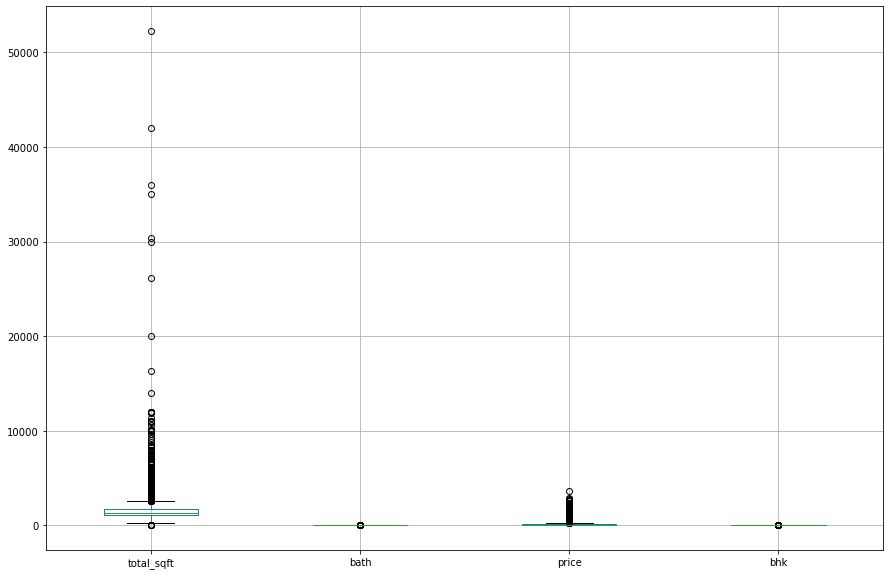

In [27]:
plt.figure(figsize=(15,10))
df4.boxplot()

C:\Users\yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

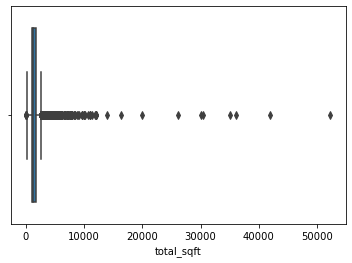

In [28]:
sns.boxplot(df4.total_sqft)

In [29]:
df4[df4.total_sqft/df4.bhk < 300]   # 1BHK area is not possible to less than 300sqft so we drop it.

,location,size,total_sqft,bath,price,bhk
9,other,6 Bedroom,1020.0,6.0,370.0,6.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0
68,other,8 Bedroom,1350.0,7.0,85.0,8.0
70,other,3 Bedroom,500.0,3.0,100.0,3.0
...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7.0
13279,other,6 Bedroom,1200.0,5.0,130.0,6.0
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5.0
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5.0


In [30]:
df5 = df4[df4.total_sqft/df4.bhk > 300]
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,other,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


C:\Users\yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

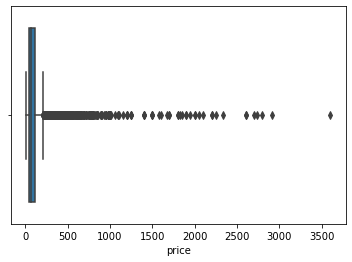

In [31]:
sns.boxplot(df5.price)

In [33]:
df5.price.describe()

count    12274.000000
mean       110.622472
std        152.925281
min          9.000000
25%         49.000000
50%         69.180000
75%        115.000000
max       3600.000000
Name: price, dtype: float64

In [34]:
upper_tail = df5.price.quantile(0.75) + (1.5 * df5.price.quantile(0.75)-df5.price.quantile(0.25))
lower_tail = df5.price.quantile(0.25) - (1.5 * df5.price.quantile(0.75)-df5.price.quantile(0.25))
print(upper_tail)
print(lower_tail)

238.5
-74.5


In [35]:
df5[(df5.price > upper_tail) | (df5.price < lower_tail)]

,location,size,total_sqft,bath,price,bhk
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4.0
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4.0
18,other,3 BHK,2770.0,4.0,290.0,3.0
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4.0
60,other,3 Bedroom,4395.0,3.0,240.0,3.0
...,...,...,...,...,...,...
13246,Sarjapur Road,4 Bedroom,2758.0,4.0,240.0,4.0
13261,other,3 Bedroom,2000.0,2.0,360.0,3.0
13290,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4.0
13316,other,4 BHK,3600.0,5.0,400.0,4.0


In [36]:
df6 = df5[(df5.price < upper_tail) & (df5.price > lower_tail)]
df6

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3.0
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0


C:\Users\yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

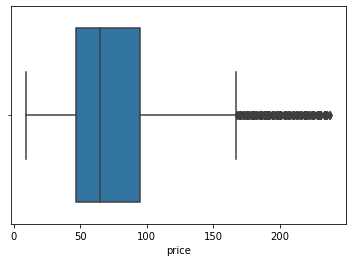

In [37]:
sns.boxplot(df6.price)

Text(0, 0.5, 'count')

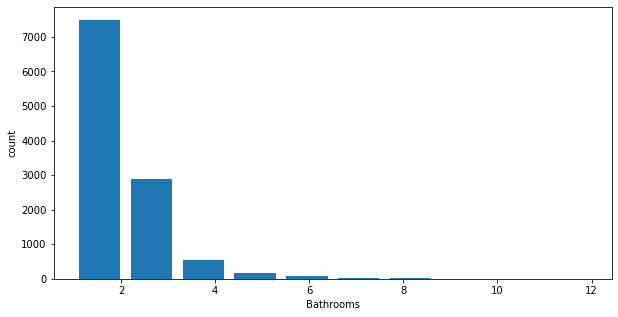

In [38]:
plt.figure(figsize=(10,5))
plt.hist(df6.bath,rwidth=0.8 )
plt.xlabel("Bathrooms")
plt.ylabel("count")

In [39]:
# we know that 4 room = 4 bath + 1 or 2 max guest bath, so anything above that is an outliers
df6[df6.bath > df6.bhk+2]


,location,size,total_sqft,bath,price,bhk
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0


In [40]:
df7 = df6[df6.bath <= df6.bhk+2]
df7.shape

(11206, 6)

In [42]:
df8 = df7.drop(["size"], axis = 1)
df8

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3.0
13314,Green Glen Layout,1715.0,3.0,112.00,3.0
13315,Whitefield,3453.0,4.0,231.00,5.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0


C:\Users\yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bhk'>

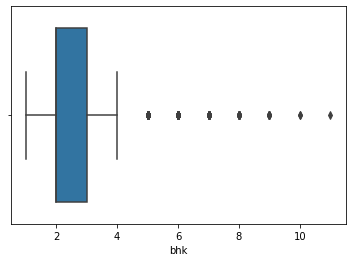

In [68]:
sns.boxplot(df8.bhk)

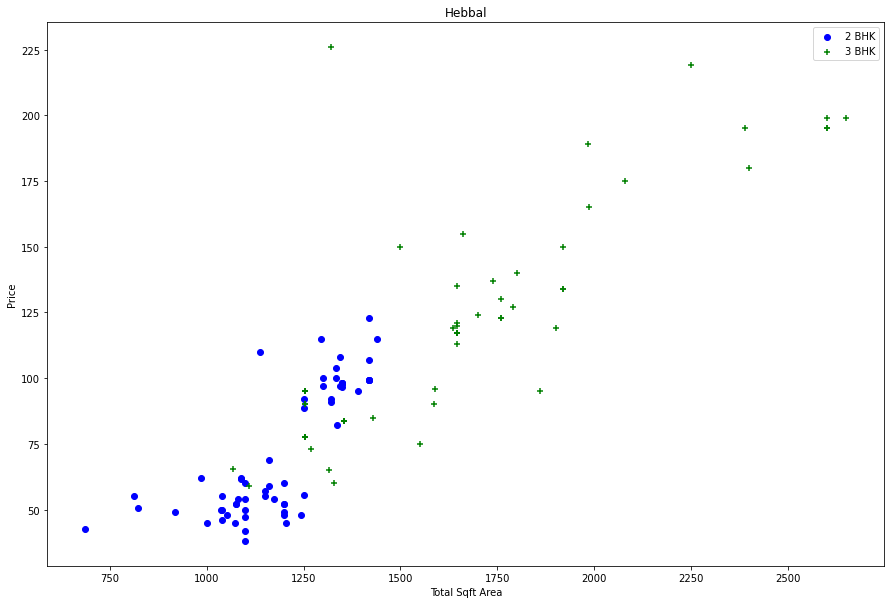

In [95]:
def scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK')
    plt.xlabel("Total Sqft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_chart(df8,"Hebbal")

#### we know price of 2 bhk is less than 3 bhk for same location

In [118]:
bhk3 = df8.loc[(((df8.location=="Hebbal") & (df8.bhk==3)), "total_sqft")]
bhk3

32       1760.0
228      1900.0
466      1760.0
620      1920.0
651      1500.0
          ...  
11605    1920.0
12782    1740.0
12807    1430.0
12951    1662.0
13075    2250.0
Name: total_sqft, Length: 62, dtype: float64

In [124]:
bhk2 = df8.loc[(((df8.location=="Hebbal") & (df8.bhk==2)), "total_sqft")]
bhk2

293      1349.0
710      1337.0
817      1349.0
835      1000.0
1057     1036.0
          ...  
12477    1162.0
12534    1294.0
12605    1150.0
13105    1349.0
13289    1349.0
Name: total_sqft, Length: 62, dtype: float64

### One Hot Encoding

In [43]:
encoding = pd.get_dummies(df8.location)
encoding

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df9 = pd.concat([df8, encoding.drop("other",axis=1)], axis=1)
df9.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df10 = df9.drop("location", axis= 1)
df10.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Training

In [46]:
x = df10.drop("price" ,axis = 1)
y = df10.price

In [47]:
x

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1345.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1715.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,1141.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13319     17.00
Name: price, Length: 11206, dtype: float64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

In [50]:
linear_model = LinearRegression()

In [51]:
linear_model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [60]:
y_pread = linear_model.predict(x_test)
y_pread

array([63.98640393, 44.95414192, 56.10194686, ..., 96.18160244,
       68.85494236, 66.9538432 ])

In [61]:
score = r2_score(y_pread, y_test)
score

0.1933079006511046

In [62]:
linear_model.score(x_test, y_test)

0.5454312490470845

In [54]:
y_pread_train = linear_model.predict(x_train)
y_pread_train

array([59.79481462, 65.33953247, 55.80131123, ..., 68.50928797,
       31.31511442, 67.05753952])

In [55]:
score = r2_score(y_pread_train, y_train)
score

0.18596797580993307

In [56]:
mea = mean_absolute_error(y_pread, y_test)
mea

19.907457114234898

In [57]:
mse = mean_squared_error(y_pread, y_test)
mse

827.776739221634

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([ 5.45787617e-01,  5.41239089e-01,  5.08909448e-01, -4.46616907e+13,
        5.26882612e-01])

In [122]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.519976,{'normalize': True}
1,lasso,0.403086,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.545413,"{'criterion': 'mse', 'splitter': 'best'}"


#### Export the tested model to a pickle file

In [126]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linear_model,f)

####  Export location and column information to a file that will be useful later on in our prediction application